Imports:

In [1]:
import numpy as np 
import scipy.io as idlsave
import glob
from importlib import reload
from sunkit_image.trace import occult2
from utilities.plot import plot_maps

c:\Users\benoi\anaconda3\envs\fdl22\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read data:

In [2]:
filename = '../aia_171.sav'
tmp = idlsave.readsav(filename)
img = tmp['img']['img'][0][0:904, 0:904]

In [3]:
"""
Parameters
    ----------
    image : `numpy.ndarray`, `sunpy.map.GenericMap`
        Image in which loops are to be detected.
    nsm1 : `int`
        Low pass filter boxcar smoothing constant.
    rmin : `int`
        The minimum radius of curvature of the loop to be detected in pixels.
    lmin : `int`
        The length of the smallest loop to be detected in pixels.
    nstruc : `int`
        Maximum limit of traced structures.
    ngap : `int`
        Number of pixels in the loop below the flux threshold.
    qthresh1 : `float`
        The ratio of image base flux and median flux. All the pixels in the image below
        `qthresh1 * median` intensity value are made to zero before tracing the loops.
    qthresh2 : `float`
        The factor which determines noise in the image. All the intensity values between
        `qthresh2 * median` are considered to be noise. The median for noise is chosen
        after the base level is fixed.
"""

# Default OCCULT parameter values

# Band pass filter
nsm1_default = 9 # value from paper
# nsm2_default = 3  # variable from paper, not used

rmin_default = 30  # value from paper
# q_med_default = 1.0  # variable from paper, not used
lmin_default = 70  # value not found
nstruc_default = 5 # 2000  # value not found
ngap_default = 5  # value not found

# Base level threshold
qthresh1_default = 0.0   # value not found
# Noise level threshold (after band pass filter)
qthresh2_default = 3.0  # value not found

In [4]:
# Parameters
nsm1 = nsm1_default
rmin = rmin_default
lmin = lmin_default 
nstruc = nstruc_default 
ngap = ngap_default 
qthresh1 = qthresh1_default 
qthresh2 = qthresh2_default 
# Loops (list of coordinates along each loop (x, y))
loops = occult2(img.T, nsm1, rmin, lmin, nstruc, ngap, qthresh1, qthresh2)

c:\Users\benoi\anaconda3\envs\fdl22\lib\site-packages\numpy\core\fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 29.16it/s]


127
113


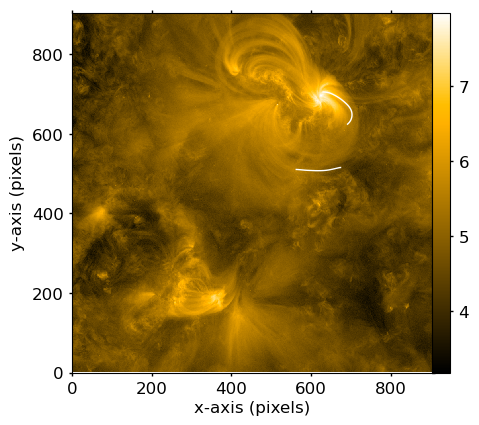

In [5]:
plot_maps(np.log(img), img_show=True, plt_coord=loops, plt_color='white', cb_cmap='sdoaia171')